In [7]:
from gensim.models.fasttext import FastText
from scipy.stats import spearmanr

In [18]:
model = FastText.load('/Users/gretagandolfi/Desktop/thesis/progetto/fasttext/rep.bin')
sim = open('/Users/gretagandolfi/Desktop/thesis/progetto/corpus/MEN/MEN_dataset_natural_form_full.txt', 'r')
vocab = model.wv.vocab
system = []
gold = []
for l in sim:
    fields = l.rstrip('\n').split()
    w1 = fields[0].replace("-n",".n")    
    w2 = fields[1].replace("-n",".n")
    score = float(fields[2])
    if w1 in vocab and w2 in vocab:
        cos = 1 - model.wv.distance(w1,w2)
        system.append(cos)
        gold.append(score)
        #print(w1,w2,cos,score)

In [19]:
print("SPEARMAN:",spearmanr(system,gold))

SPEARMAN: SpearmanrResult(correlation=0.21294908139631397, pvalue=1.57366788905501e-07)


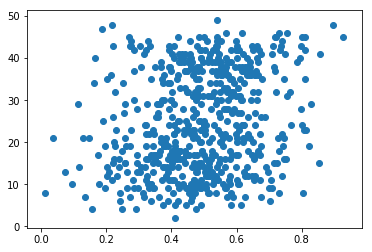

In [20]:
import matplotlib.pyplot as plt
plt.scatter(system,gold)